# Решение уравнения Шрёдингера (XI.9.14)

## Условие

Требуется найти собственные значения в уравнении: $\psi''+(E-V(x))\psi = 0$

где $E$ - энергия, которую необходимо найти; $V(x)$ - потенциал; $\psi(x)$ - волновая функция

$V(x) = -V_0/(\cosh^2(x))$

Также имеются начальные условия $\psi(-\inf)=\psi(\inf)=0$

## Решение

Данный метод параметризации был не совсем очевиден, поэтому сошлюсь на статью, которая мне в этом помогла https://www1.itp.tu-berlin.de/brandes/public_html/qm/qv3.pdf

В данной статье также имеются достаточно очевидные идеи разбиения решения на чётное и нечётное для упрощения решения данной задачи

Произведём замену переменной $\xi = \tanh(x)$; После чего получим новые граничные условия $\psi(-1)=\psi(1)=0$

\begin{equation*}
\dfrac{d^2\psi}{dx^2} + (E-V_0/\cosh^2(x))\psi = 0
\end{equation*}

\begin{equation*}
\dfrac{d\psi}{dx} = \dfrac{d\psi}{d\xi}(1-\xi^2)
\end{equation*}

\begin{equation*}
\dfrac{d^2\psi}{dx^2} = (1-\xi^2)((1-\xi^2)\dfrac{d^2\psi}{d\xi^2}-2\xi\dfrac{d\psi}{d\xi})
\end{equation*}

\begin{equation*}
\dfrac{d^2\psi}{d\xi^2} = \dfrac{2\xi}{1-\xi^2}\dfrac{d\psi}{d\xi} - \dfrac{E-V_0(1-\xi^2)}{(1-\xi^2)^2}\psi
\end{equation*}

Поставим задачу Коши:



\begin{equation}
    \begin{cases}
      u' = f_0(x, y) = \dfrac{2\xi}{1-\xi^2}u-\dfrac{E-V_0(1-\xi^2)}{(1-\xi^2)^2}v,\\
      v' = f_1(x, y) = u
    \end{cases}
\end{equation}

где произведена замена $v = \psi$, а также за $x$ и $y$ обозначены координата $\xi$ и вектор-столбец из $u, v$ соответственно

Будем решать методом стрельбы. Для этого выберем начальные условия для заданной задачи Коши: $u(0) = 0$, $v(0) = 1$ в случае нечетного решения или $u(0) = 1$, $v(0) = 0$ в случае чётного решения. Будем пристреливаться по граничному условию $\psi(1) = 0$ или же в новых обозначениях $v(1) = 0$

Также для метода стрельбы будем использовать метод Ньютона для уточнения пристрелки по энергии

$E_{n+1} = E_{n} - \dfrac{F(E_n)}{F'(E_n)}$, где $F(E_n) = \psi(1,E_n)$ и $F'(E_n) = \psi'(1, E_n)$ производная волновой функции в данном случае берётся по энергии

Для нахождения же $F'(E_n)$ требуется решить ещё одну задачу Коши: 

\begin{equation}
    \begin{cases}
      \zeta' = g_0(x, y) = \dfrac{2\xi}{1-\xi^2}\zeta-\dfrac{E-V_0(1-\xi^2)}{(1-\xi^2)^2}\eta-\dfrac{1}{(1-\xi^2)^2}v,\\
      \eta' = g_1(x, y) = \zeta,\\
      \zeta(0) = 0,\\
      \eta(0) = 0
    \end{cases}
\end{equation}

где $\zeta = \dfrac{du}{d\xi}$ и $\eta = \dfrac{dv}{d\xi}$ а производные в задаче Коши берутся по $E$

В наших новых обозначениях $F'(E_n) = \eta(1, E_n)$ и $F(E_n) = v(1, E_n)$

### Импорт библиотек и определение глобальных переменных

In [55]:
import numpy as np
import matplotlib.pyplot as plt

STEP = 0.001

### Определение функций из условия

In [56]:
def f0(x, y, E):
    return 2*x/(1-x**2)*y[0] - (E+V0*(1-x**2))/(np.power((1-x**2), 2))*y[1]

def f1(x, y):
    return y[0]

def func_f(x, y, E):
    return np.array([f0(x, y, E), f1(x, y)])

def g0(g, x, y, E):
    return 2*x/(1-x**2)*g[0] - (E+V0*(1-x**2))/(np.power((1-x**2), 2))*g[1] - y[1]/(np.power(1-x**2, 2))

def g1(g, x, y):
    return g[0]

def func_g(g, x, y, E):
    return np.array([g0(g, x, y, E), g1(g, x, y)])

### МРК 3-го порядка

In [57]:
# МРК 3-го порядка
def delta_y_kuta_first(x, y, E):
	k1 = func_f(x, y, E)*STEP
	k2 = func_f(x + STEP/2, y + k1/2, E)*STEP
	k3 = func_f(x + STEP, y - k1 + 2*k2, E)*STEP
	return (k1 + 4*k2 + k3)/6

def delta_y_kuta_second(g, x, y, E):
	k1 = func_g(g, x, y, E)*STEP
	k2 = func_g(g + k1/2, x, y, E)*STEP
	k3 = func_g(g - k1 + 2*k2, x, y, E)*STEP
	return (k1 + 4*k2 + k3)/6

### Реализация метода стрельбы

In [58]:
def NewtonMethod(y_start, E):
    x = np.arange(0, 1, STEP)
    size = np.shape(x)[0]
    y = np.zeros((int(size), 2))
    y[0] = y_start

    g = np.zeros((int(size), 2))
    g[0] = np.array([0, 0])

    for i in range(1, size):
        y[i] = y[i-1] + delta_y_kuta_first(x[i-1], y[i-1], E)
        g[i] = g[i-1] + delta_y_kuta_second(g[i-1], x[i-1], y[i-1], E)

    Func = y[-1, 1]
    FuncDerive = g[-1, 1]
    return Func, E - Func/FuncDerive, x, y[:, 1]

In [59]:
def __eq__(self, other):
    return np.abs(self - other) < 1e-3

def get_energy(cond):
    energy = np.linspace(-V0, 0, 10)
    accuracy = 1e-4
    sol = np.array([])
    for item in energy:
        is_valid = True
        while(1):
            bound, curr, x, y = NewtonMethod(cond, item)
            if (np.abs(bound) < accuracy):
                break
            item = curr
            if (item >= 0.0):
                is_valid = False
                break
        is_contain = False
        for sol_item in sol:
            if (__eq__(sol_item, item)):
                is_contain = True
        if (not is_contain and is_valid):
            sol = np.append(sol, item)
    return sol

### Построение графиков

In [60]:
def plot_psi(sol, start_cond):
	for energy in sol:
		x = np.arange(0, 1, STEP)
		half = np.shape(x)[0]
		y_half = np.zeros((int(half), 2))
		y_half[0] = start_cond

		for i in range(1, half):
			y_half[i] = y_half[i-1] + delta_y_kuta_first(x[i-1], y_half[i-1], energy)

		y_half = y_half[:, 1]

		x = np.arange(-1, 1, STEP)
		size = np.shape(x)[0]
		y = np.zeros(int(size))
		for i in range(half, size):
			y[i] = y_half[i - half]

		even = False
		if (start_cond[1]):
			even = True
		if (even):
			for i in range(1, half):
				y[i] = y[size - i]
		else:
			for i in range(1, half):
				y[i] = -y[size - i]

		x = np.arctanh(x)
		plt.plot(x, y, '-', label=str('$E$ = ' + str(energy)))

/tmp/ipykernel_5104/803880852.py:29: RuntimeWarning: divide by zero encountered in arctanh
  x = np.arctanh(x)


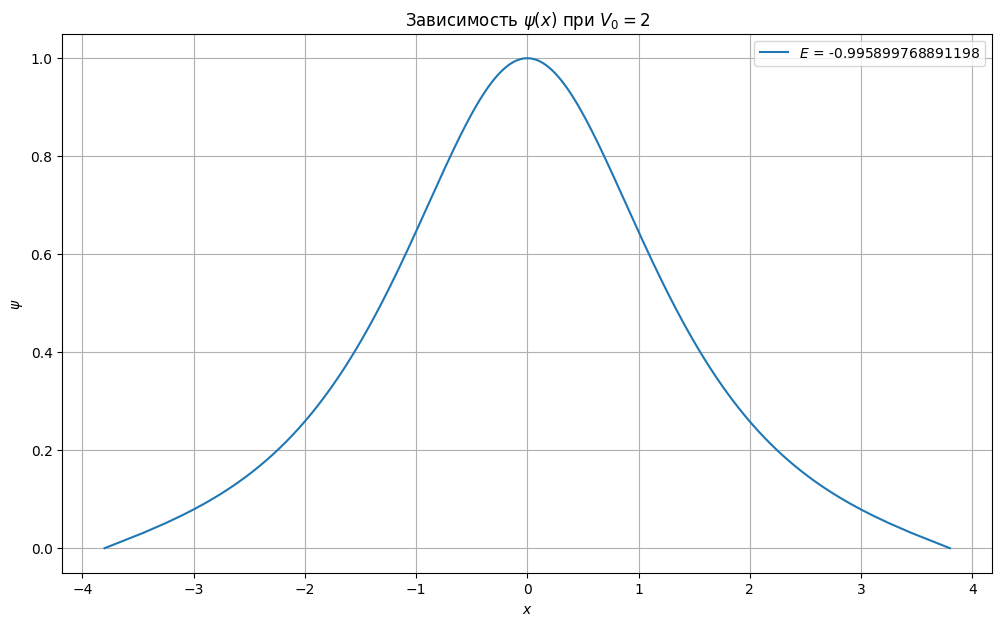

In [61]:
V0 = 2
accuracy = 1e-4

odd_sol = np.array([])
even_sol = np.array([])

start_cond = np.array([[0, 1],[1, 0]])
even_start_cond = start_cond[0]
odd_start_cond = start_cond[1]

even_sol = get_energy(even_start_cond)
odd_sol = get_energy(odd_start_cond)

fig = plt.figure(figsize=[12, 7])
plt.title('Зависимость $\psi(x)$ при $V_0 =$' + str(V0))
plt.xlabel("$x$")
plt.ylabel("$\psi$")
plt.grid()

plot_psi(even_sol, even_start_cond)
plot_psi(odd_sol, odd_start_cond)

plt.legend()

/tmp/ipykernel_5104/803880852.py:29: RuntimeWarning: divide by zero encountered in arctanh
  x = np.arctanh(x)


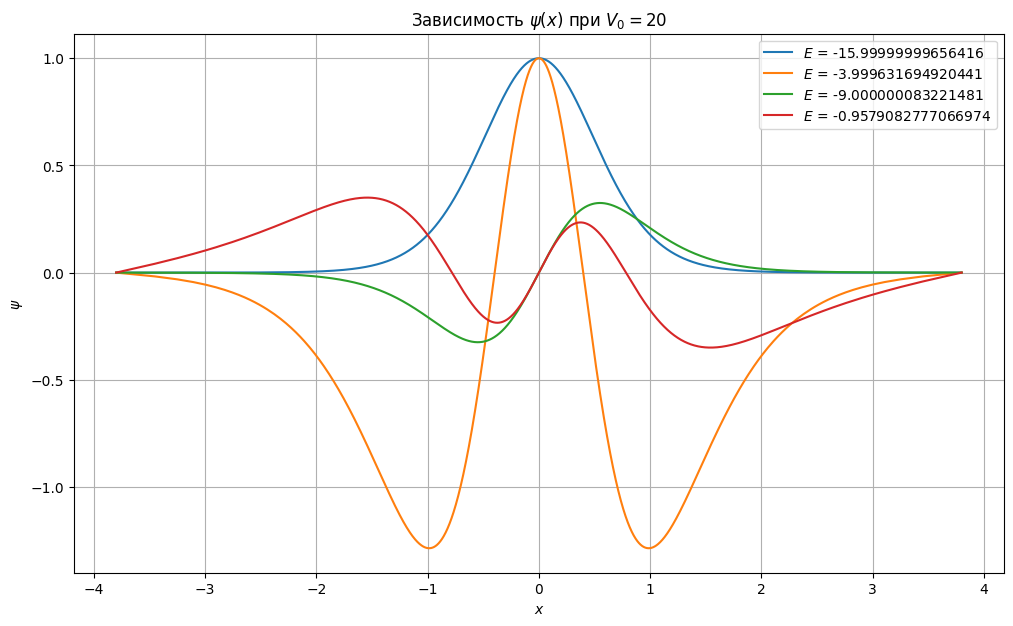

In [62]:
V0 = 20

accuracy = 1e-4

odd_sol = np.array([])
even_sol = np.array([])

start_cond = np.array([[0, 1],[1, 0]])
even_start_cond = start_cond[0]
odd_start_cond = start_cond[1]

even_sol = get_energy(even_start_cond)
odd_sol = get_energy(odd_start_cond)

fig = plt.figure(figsize=[12, 7])
plt.title('Зависимость $\psi(x)$ при $V_0 =$' + str(V0))
plt.xlabel("$x$")
plt.ylabel("$\psi$")
plt.grid()

plot_psi(even_sol, even_start_cond)
plot_psi(odd_sol, odd_start_cond)

plt.legend()